# Deep Learning for Financial Trading USD/JPY

Forex is the biggest market in the world, and USD/JPY is one the most common trading currencies pairs.
<br>This code is an example of using ANN, and LSTM in Forex trading.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from IPython.core.display import display

,Gmt time,Open,High,Low,Close,Volume
0,02.04.2018 21:00:00.000,105.878,106.655,105.692,106.607,185396.9492
1,03.04.2018 21:00:00.000,106.606,106.846,105.990,106.773,197000.7405
2,04.04.2018 21:00:00.000,106.772,107.491,106.710,107.381,232549.5229
3,05.04.2018 21:00:00.000,107.381,107.460,106.775,106.902,207747.0703
4,06.04.2018 21:00:00.000,106.902,106.902,106.902,106.902,0.0000
5,07.04.2018 21:00:00.000,106.902,106.902,106.902,106.902,0.0000
6,08.04.2018 21:00:00.000,106.931,107.203,106.616,106.752,189693.8200
7,09.04.2018 21:00:00.000,106.757,107.397,106.618,107.197,182532.4399
8,10.04.2018 21:00:00.000,107.192,107.250,106.650,106.786,156599.1909
9,11.04.2018 21:00:00.000,106.785,107.429,106.700,107.317,143194.3387


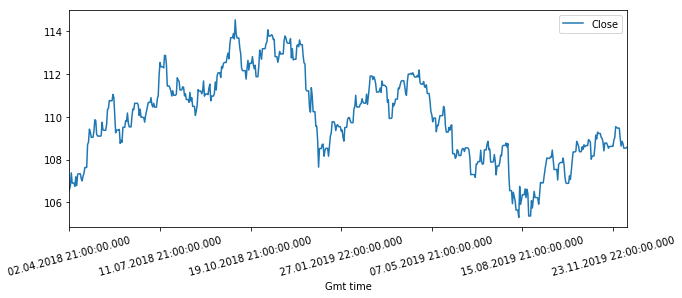

In [2]:
historic_df = pd.read_csv("USDJPY_Candlestick_1_D_BID_03.04.2018-10.12.2019.csv")
dates = pd.to_datetime(historic_df['Gmt time'], format="%d.%m.%Y %H:%M:%S.%f")
df = pd.DataFrame(historic_df)
df.head(10)
df.plot(x='Gmt time',y='Close',figsize=(10,4))
plt.xticks(rotation=15)
df.head(10)

In [3]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Time', 'Close'])

In [4]:
for i in range(0,len(df)):
     new_data['Time'][i] = df['Gmt time'][i]
     new_data['Close'][i] = df['Close'][i]

In [5]:
print(type(new_data["Time"]))
new_data.info()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 2 columns):
Time     617 non-null object
Close    617 non-null object
dtypes: object(2)
memory usage: 9.7+ KB


In [6]:
new_data['Time']=pd.to_datetime(new_data['Time'], dayfirst=True)

In [7]:
new_data = new_data.set_index('Time')

In [8]:
new_data.head(5)

,Close
Time,
2018-04-02 21:00:00,106.607
2018-04-03 21:00:00,106.773
2018-04-04 21:00:00,107.381
2018-04-05 21:00:00,106.902
2018-04-06 21:00:00,106.902


(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.,
        737241., 737303., 737364.]), <a list of 10 Text xticklabel objects>)

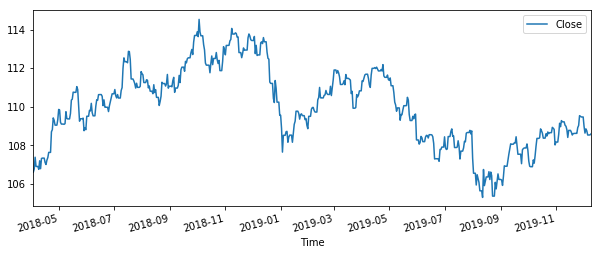

In [9]:
new_data.plot(figsize=(10,4))
plt.xticks(rotation =15)

In [10]:
new_data = new_data.astype(float)

In [11]:
#We chose the date to split the dataset.
split_date = pd.Timestamp('18-09-2019 21:00:00.000')

In [12]:
train = new_data.loc[:split_date]
test = new_data.loc[split_date:]

(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.,
        737241., 737303., 737364.]), <a list of 10 Text xticklabel objects>)

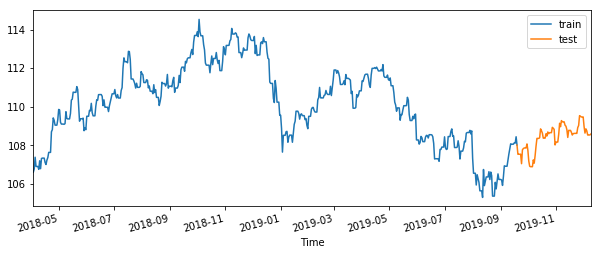

In [13]:
ax = train.plot(figsize=(10,4))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.xticks(rotation = 15)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [16]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [17]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [18]:
K.clear_session()
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
534/534 [==============================] - 1s 2ms/step - loss: 0.0154
Epoch 2/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 3/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 4/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 5/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 6/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 7/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 8/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 9/200
534/534 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 10/200
534/534 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 11/200
534/534 [==============================] - 1s 

In [19]:
model.save('ANN_NonShift.h5')

In [20]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [21]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
534/534 [==============================] - 4s 7ms/step - loss: 0.0148
Epoch 2/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0055
Epoch 3/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0035
Epoch 4/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0025
Epoch 5/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 6/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 7/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0017
Epoch 8/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0017
Epoch 9/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 10/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 11/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 12/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 13/200


534/534 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 100/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 101/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 102/200
534/534 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 103/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 104/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 105/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 106/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 107/200
534/534 [==============================] - 2s 5ms/step - loss: 0.0016
Epoch 108/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 109/200
534/534 [==============================] - 2s 5ms/step - loss: 0.0016
Epoch 110/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 

534/534 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 197/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 198/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 199/200
534/534 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 200/200
534/534 [==============================] - 2s 3ms/step - loss: 0.0015


In [22]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

In [23]:
model_lstm.save('LSTM_NonShift.h5')

In [24]:
model_ann = load_model('ANN_NonShift.h5')
model_lstm = load_model('LSTM_NonShift.h5')

In [25]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

82/82 [==============================] - 0s 5ms/step


In [26]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)

ANN: 0.002903
LSTM: 0.001154


In [27]:
y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [28]:
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN_prediction'])
col3 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])
col4 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])
col5 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3, col4, col5], axis=1)
results = pd.concat([col1, col3, col5], axis=1)

results.to_excel('PredictionResults_ANN-LSTM_NonShift.xlsx')

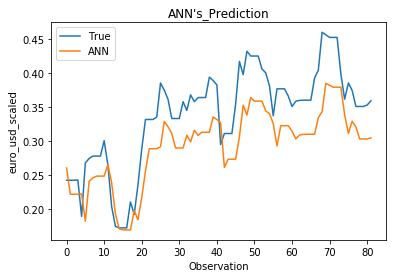

In [29]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

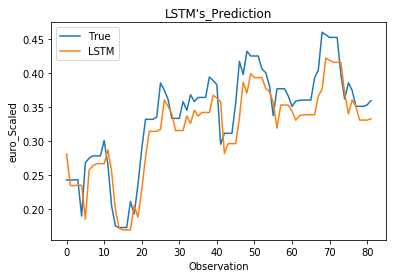

In [30]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_Scaled')
plt.legend()
plt.show()